In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, dbscan

import acquire
import prep
import split_scale

import warnings
warnings.filterwarnings("ignore")

### Acquire

Pull single unit properties with transactions in 2017 from sql

In [6]:
df = pd.read_csv(r'/Users/mists/codeup-data-science/zillow-cluster/query_result.csv')

In [7]:
df = acquire.wrangle_zillow(df)

Check out data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 61 columns):
parcelid                        52292 non-null int64
basementsqft                    47 non-null float64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
buildingqualitytypeid           33632 non-null float64
calculatedbathnbr               52158 non-null float64
decktypeid                      388 non-null float64
finishedfloor1squarefeet        4368 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
finishedsquarefeet12            52047 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            0 non-null float64
finishedsquarefeet50            4368 non-null float64
finishedsquarefeet6             164 non-null float64
fips                            52292 non-null int64
fireplacecnt                    7230 non-null float64
fullbathcnt                     521

In [9]:
df.head()

parcelid  basementsqft  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
77578  12826780           NaN          2.0           3                    6.0   
77577  12773139           NaN          1.0           3                    4.0   
77576  17239384           NaN          2.0           4                    NaN   
77575  11000655           NaN          2.0           2                    6.0   
77394  11388980           NaN          2.0           3                    6.0   

       calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
77578                2.0         NaN                       NaN   
77577                1.0         NaN                       NaN   
77576                2.0         NaN                    1612.0   
77575                2.0         NaN                       NaN   
77394                2.0         NaN                       NaN   

       calculatedfinishedsquarefeet  finishedsquarefeet12  ...  \
77578                        1762.0                1762.0  ...   
77577                        1032.0                1032.0  ...   
77576                        1612.0                1612.0  ...   
77575                        1286.0                1286.0  ...   
77394                        1518.0                1518.0  ...   

       airconditioningdesc  architecturalstyledesc  buildingclassdesc  \
77578                  NaN                     NaN                NaN   
77577              Central                     NaN                NaN   
77576                  NaN                     NaN                NaN   
77575                  NaN                     NaN                NaN   
77394                  NaN                     NaN                NaN   

       heatingorsystemdesc   id.1  logerror  transactiondate  \
77578              Central  77612  0.007204       2017-09-25   
77577              Central  77611  0.037129       2017-09-21   
77576                  NaN  77610  0.013209       2017-09-21   
77575              Central  77609  0.020615       2017-09-20   
77394           Floor/Wall  77428  0.023168       2017-09-19   

             propertylandusedesc  storydesc  typeconstructiondesc  
77578  Single Family Residential        NaN                   NaN  
77577  Single Family Residential        NaN                   NaN  
77576  Single Family Residential        NaN                   NaN  
77575  Single Family Residential        NaN                   NaN  
77394  Single Family Residential        NaN                   NaN  

[5 rows x 61 columns]

In [10]:
df.shape

(52292, 61)

### Prepare

Remove columns, then rows with a missing values

In [11]:
prep.handle_missing_values(df, .90, .40).shape

(52292, 28)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 28 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedbathnbr               52158 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
finishedsquarefeet12            52047 non-null float64
fips                            52292 non-null int64
fullbathcnt                     52158 non-null float64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
propertycountylandusecode       52292 non-null object
rawcensustractandblock          52292 non-null float64
regionidcity                    51256 non-null float64
regionidcounty                  52292 non-null int64
regionidzip                     52266 non-null float64
roomcnt                 

Check out nulls

In [13]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                134
calculatedfinishedsquarefeet      81
finishedsquarefeet12             245
fips                               0
fullbathcnt                      134
latitude                           0
longitude                          0
lotsizesquarefeet                362
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1036
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              118
id.1                               0
logerror                           0
transactiondate                    0
p

In [14]:
df.propertylandusedesc.value_counts()

Single Family Residential    52292
Name: propertylandusedesc, dtype: int64

Drop columns with minimal nulls

In [15]:
    df.drop(columns=["fullbathcnt", "finishedsquarefeet12", "regionidcounty", "propertycountylandusecode", 
                     "rawcensustractandblock", "censustractandblock", "regionidzip", 
                     "assessmentyear", "propertylandusedesc"], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 19 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedbathnbr               52158 non-null float64
calculatedfinishedsquarefeet    52211 non-null float64
fips                            52292 non-null int64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
regionidcity                    51256 non-null float64
roomcnt                         52292 non-null int64
yearbuilt                       52178 non-null float64
structuretaxvaluedollarcnt      52213 non-null float64
taxvaluedollarcnt               52291 non-null float64
landtaxvaluedollarcnt           52291 non-null float64
taxamount                       52288 non-null float64
id.1                   

In [17]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                134
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [18]:
df.describe()

parcelid   bathroomcnt    bedroomcnt  calculatedbathnbr  \
count  5.229200e+04  52292.000000  52292.000000       52158.000000   
mean   1.299711e+07      2.299377      3.300199           2.304594   
std    3.351561e+06      1.020189      0.945104           1.015472   
min    1.071186e+07      0.000000      0.000000           1.000000   
25%    1.151000e+07      2.000000      3.000000           2.000000   
50%    1.257921e+07      2.000000      3.000000           2.000000   
75%    1.413042e+07      3.000000      4.000000           3.000000   
max    1.676878e+08     13.000000     11.000000          13.000000   

       calculatedfinishedsquarefeet          fips      latitude     longitude  \
count                  52211.000000  52292.000000  5.229200e+04  5.229200e+04   
mean                    1922.401984   6049.137382  3.402249e+07 -1.181940e+08   
std                     1000.864812     21.027889  2.740681e+05  3.567045e+05   
min                      128.000000   6037.000000  3.334062e+07 -1.194754e+08   
25%                     1268.000000   6037.000000  3.382684e+07 -1.184008e+08   
50%                     1659.000000   6037.000000  3.402365e+07 -1.181530e+08   
75%                     2305.000000   6059.000000  3.418726e+07 -1.179289e+08   
max                    21929.000000   6111.000000  3.481877e+07 -1.175546e+08   

       lotsizesquarefeet   regionidcity       roomcnt     yearbuilt  \
count       5.193000e+04   51256.000000  52292.000000  52178.000000   
mean        1.131517e+04   33484.556111      1.895108   1963.435969   
std         8.675146e+04   49101.555929      3.147328     23.115157   
min         2.360000e+02    3491.000000      0.000000   1878.000000   
25%         5.583000e+03   12447.000000      0.000000   1950.000000   
50%         6.841000e+03   24812.000000      0.000000   1961.000000   
75%         8.799750e+03   40227.000000      5.000000   1979.000000   
max         6.971010e+06  396556.000000     15.000000   2016.000000   

       structuretaxvaluedollarcnt  taxvaluedollarcnt  landtaxvaluedollarcnt  \
count                5.221300e+04       5.229100e+04           5.229100e+04   
mean                 1.965926e+05       5.285978e+05           3.322985e+05   
std                  2.542889e+05       7.206677e+05           5.285519e+05   
min                  1.290000e+02       1.000000e+03           1.610000e+02   
25%                  7.715100e+04       1.939865e+05           7.614400e+04   
50%                  1.318830e+05       3.739690e+05           2.180790e+05   
75%                  2.264300e+05       6.192745e+05           4.086135e+05   
max                  9.164901e+06       2.538125e+07           2.233550e+07   

           taxamount          id.1      logerror  
count   52288.000000  52292.000000  52292.000000  
mean     6440.303283  38904.022872      0.018103  
std      8371.170666  22345.099178      0.176545  
min        49.180000      0.000000     -4.655420  
25%      2660.135000  19611.500000     -0.024692  
50%      4650.130000  38983.500000      0.006940  
75%      7376.815000  58140.250000      0.040595  
max    290998.060000  77612.000000      5.262999

Check out distribution of calculatedbathnbr

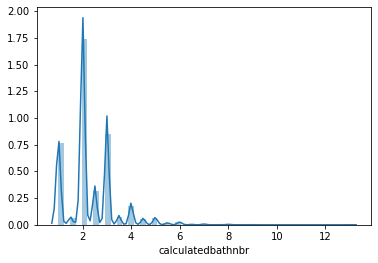

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.calculatedbathnbr.dropna())
plt.show()

In [20]:
df.calculatedbathnbr.value_counts(dropna=False)

2.0     21832
3.0     10643
1.0      9534
2.5      3924
4.0      2219
3.5       916
1.5       832
5.0       803
4.5       685
6.0       318
5.5       223
NaN       134
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
8.5         3
11.0        3
13.0        1
Name: calculatedbathnbr, dtype: int64

In [21]:
 (df.bathroomcnt != df.calculatedbathnbr).sum()

134

In [22]:
df.calculatedbathnbr.isnull().sum()

134

Calculatedbathnbr and bathroomcnt are the same information, but calculatedbathnbr has nulls. Removed. 

In [23]:
df.drop(columns="calculatedbathnbr", inplace=True)

In [24]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [25]:
df.calculatedfinishedsquarefeet.value_counts(bins=10)

(106.198, 2308.1]     39190
(2308.1, 4488.2]      11802
(4488.2, 6668.3]       1002
(6668.3, 8848.4]        157
(8848.4, 11028.5]        42
(11028.5, 13208.6]       12
(19748.9, 21929.0]        2
(15388.7, 17568.8]        2
(13208.6, 15388.7]        2
(17568.8, 19748.9]        0
Name: calculatedfinishedsquarefeet, dtype: int64

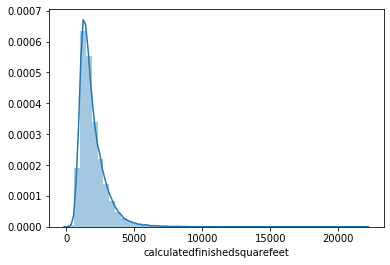

In [26]:
sns.distplot(df.calculatedfinishedsquarefeet.dropna())
plt.show()

In [27]:
df.calculatedfinishedsquarefeet.describe()

count    52211.000000
mean      1922.401984
std       1000.864812
min        128.000000
25%       1268.000000
50%       1659.000000
75%       2305.000000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52292 entries, 77578 to 0
Data columns (total 18 columns):
parcelid                        52292 non-null int64
bathroomcnt                     52292 non-null float64
bedroomcnt                      52292 non-null int64
calculatedfinishedsquarefeet    52211 non-null float64
fips                            52292 non-null int64
latitude                        52292 non-null int64
longitude                       52292 non-null int64
lotsizesquarefeet               51930 non-null float64
regionidcity                    51256 non-null float64
roomcnt                         52292 non-null int64
yearbuilt                       52178 non-null float64
structuretaxvaluedollarcnt      52213 non-null float64
taxvaluedollarcnt               52291 non-null float64
landtaxvaluedollarcnt           52291 non-null float64
taxamount                       52288 non-null float64
id.1                            52292 non-null int64
logerror                 

In [29]:
df.calculatedfinishedsquarefeet.median()

1659.0

In [30]:
df.calculatedfinishedsquarefeet.mean()

1922.4019842561913

In [31]:
df.structuretaxvaluedollarcnt.median()

131883.0

In [32]:
df.structuretaxvaluedollarcnt.mean()

196592.61356367188

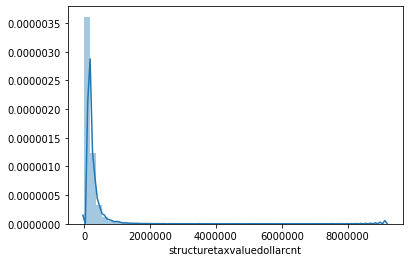

In [33]:
sns.distplot(df.structuretaxvaluedollarcnt.dropna())
plt.show()

In [34]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      81
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                362
regionidcity                    1036
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

After exploring distributions and summary stats for calculatedfininshedsquarefeet and structuretaxvaluedollarcnt, removed rows with nulls. Also, for other catergories, removed rows with minimal nulls.

In [35]:
df.dropna(axis=0,subset=["calculatedfinishedsquarefeet","structuretaxvaluedollarcnt",
                         "taxvaluedollarcnt","landtaxvaluedollarcnt","taxamount"], inplace=True)

In [36]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                340
regionidcity                    1026
roomcnt                            0
yearbuilt                         38
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          0
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

In [37]:
df.dropna(axis=0,subset=["yearbuilt"], inplace=True)

In [38]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                340
regionidcity                    1020
roomcnt                            0
yearbuilt                          0
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          0
id.1                               0
logerror                           0
transactiondate                    0
dtype: int64

Explore lot size and the nulls

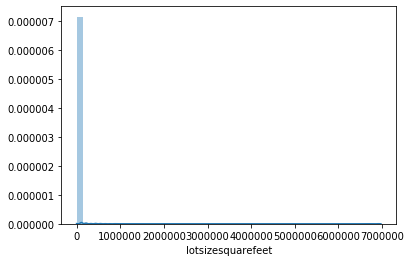

In [39]:
sns.distplot(df.lotsizesquarefeet.dropna())

In [40]:
df.lotsizesquarefeet.value_counts(dropna=False, bins=15)

(-6734.775000000001, 464954.267]    51719
(464954.267, 929672.533]               28
(6506291.733, 6971010.0]                7
(929672.533, 1394390.8]                 3
(1394390.8, 1859109.067]                2
(2788545.6, 3253263.867]                1
(2323827.333, 2788545.6]                1
(6041573.467, 6506291.733]              0
(5576855.2, 6041573.467]                0
(5112136.933, 5576855.2]                0
(4647418.667, 5112136.933]              0
(4182700.4, 4647418.667]                0
(3717982.133, 4182700.4]                0
(3253263.867, 3717982.133]              0
(1859109.067, 2323827.333]              0
Name: lotsizesquarefeet, dtype: int64

In [41]:
df.shape

(52101, 18)

In [42]:
# df["totallotvalue"] = df.landtaxvaluedollarcnt + df.structuretaxvaluedollarcnt

In [43]:
# (df.totallotvalue != df.taxvaluedollarcnt).sum()

total value column is unnecessary as it equals the the taxvaluedollarcnt

In [44]:
# df["proportionlotandvalue"] = df.lotsizesquarefeet.dropna() / df.taxvaluedollarcnt

In [45]:
# df.proportionlotandvalue.describe()

Take the mean of proportions less that 1

In [46]:
# mean_proportion = df [df.proportionlotandvalue < 1].proportionlotandvalue.mean()
# mean_proportion

In [47]:
# df_subset = df[["lotsizesquarefeet","totallotvalue"]]

In [48]:
# df_subset["mean"] = mean_proportion

In [49]:
# df_subset.head()

Fill the lot size nulls with the previous calculated mean

In [50]:
# df_subset.lotsizesquarefeet.fillna(df_subset.totallotvalue * df_subset["mean"], inplace=True)

In [51]:
# df_subset.isnull().sum()

In [52]:
# df_subset.head()

In [53]:
# df.head()

Replace lot size column with newly created non-null column

In [54]:
# df.lotsizesquarefeet = df_subset.lotsizesquarefeet

In [55]:
# df.isnull().sum()

create function with imputing lot size after split

In [56]:
# df.drop(columns=["regionidcity", "totallotvalue","proportionlotandvalue"],inplace=True)

In [57]:
# df.isnull().sum()

Remove roomcount because too many zero values

In [58]:
df.roomcnt.value_counts()

0     37588
6      3966
7      3598
8      2805
5      1879
9      1172
4       515
10      338
11      105
3        74
12       34
13       10
2        10
14        5
15        1
1         1
Name: roomcnt, dtype: int64

In [59]:
df.drop(columns=["parcelid","roomcnt"], inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52101 entries, 77578 to 0
Data columns (total 16 columns):
bathroomcnt                     52101 non-null float64
bedroomcnt                      52101 non-null int64
calculatedfinishedsquarefeet    52101 non-null float64
fips                            52101 non-null int64
latitude                        52101 non-null int64
longitude                       52101 non-null int64
lotsizesquarefeet               51761 non-null float64
regionidcity                    51081 non-null float64
yearbuilt                       52101 non-null float64
structuretaxvaluedollarcnt      52101 non-null float64
taxvaluedollarcnt               52101 non-null float64
landtaxvaluedollarcnt           52101 non-null float64
taxamount                       52101 non-null float64
id.1                            52101 non-null int64
logerror                        52101 non-null float64
transactiondate                 52101 non-null object
dtypes: float64(10), i

Rename columns to things more relevant

In [61]:
df.rename(columns={"calculatedfinishedsquarefeet":"house_area","fips":"countyid","structuretaxvaluedollarcnt":"house_value", 
                   "taxvaluedollarcnt":"whole_value","landtaxvaluedollarcnt":"land_value","lotsizesquarefeet":"whole_area"}, 
          inplace=True)

In [62]:
df.shape

(52101, 16)

In [63]:
df.head()

bathroomcnt  bedroomcnt  house_area  countyid  latitude  longitude  \
77578          2.0           3      1762.0      6037  33937685 -117996709   
77577          1.0           3      1032.0      6037  34040895 -118038169   
77576          2.0           4      1612.0      6111  34300140 -118706327   
77575          2.0           2      1286.0      6037  34245368 -118282383   
77394          2.0           3      1518.0      6037  33983643 -118362294   

       whole_area  regionidcity  yearbuilt  house_value  whole_value  \
77578      6347.0       14634.0     1955.0     140000.0     522000.0   
77577      5074.0       36502.0     1954.0      32797.0      49546.0   
77576     12105.0       27110.0     1964.0      50683.0      67205.0   
77575     47405.0       12447.0     1940.0      70917.0     354621.0   
77394      5799.0      116042.0     1948.0     116897.0     229242.0   

       land_value  taxamount   id.1  logerror transactiondate  
77578    382000.0    6317.15  77612  0.007204      2017-09-25  
77577     16749.0     876.43  77611  0.037129      2017-09-21  
77576     16522.0    1107.48  77610  0.013209      2017-09-21  
77575    283704.0    4478.43  77609  0.020615      2017-09-20  
77394    112345.0    3277.29  77428  0.023168      2017-09-19

In [64]:
df.drop(columns="regionidcity", inplace=True)

In [65]:
df.drop(columns="id.1", inplace=True)

### Split

In [66]:
train, test = split_scale.split_my_data(df, .80)

In [67]:
train, test = prep.impute_lotsize_nulls(train, test)

In [68]:
train = prep.cal_land_area(train)
test = prep.cal_land_area(test)

KeyError: "['month', 'taxrate'] not in index"

In [ ]:
train.info()

### Explore

In [ ]:
features = list(train.columns)
features_num = list(train.select_dtypes(np.number).columns)
features_obj = list(train.select_dtypes(exclude=np.number).columns)

In [ ]:
for feature in features_num:
    sns.distplot(df[feature].dropna())
    plt.show()
    if train[feature].nunique() >= 25:
        print(train[feature].value_counts(bins=10, sort=False))
    else:
        print(train[feature].value_counts())
        

In [69]:
train_ex = train

transform transaction date to just month

In [70]:
# pd.to_datetime(train_ex.transactiondate)
train_ex["month"] = pd.DatetimeIndex(train_ex.transactiondate).month  
train_ex = train_ex.drop("transactiondate",axis=1)
train_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41680 entries, 28235 to 54472
Data columns (total 15 columns):
bathroomcnt    41680 non-null float64
bedroomcnt     41680 non-null int64
house_area     41680 non-null float64
countyid       41680 non-null int64
latitude       41680 non-null int64
longitude      41680 non-null int64
whole_area     41680 non-null float64
yearbuilt      41680 non-null float64
house_value    41680 non-null float64
whole_value    41680 non-null float64
land_value     41680 non-null float64
taxamount      41680 non-null float64
logerror       41680 non-null float64
land_area      41680 non-null float64
month          41680 non-null int64
dtypes: float64(10), int64(5)
memory usage: 6.3 MB


In [71]:
def elbow(df, points=10):
    ks = range(1,points+1)
    sse = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_)
#     print(pd.DataFrame(dict(k=ks, sse=sse)))
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title(f'Elbow Method for optimal k')
    plt.show()

In [72]:
sub1 = train_ex[["month","house_value"]]

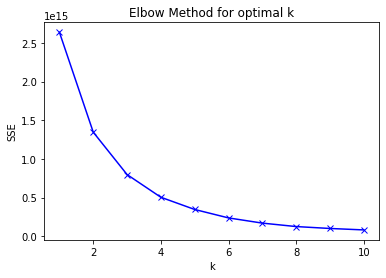

In [73]:
elbow(sub1)

In [74]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(train_ex)
train_ex["cluster"] = kmeans.predict(train_ex)

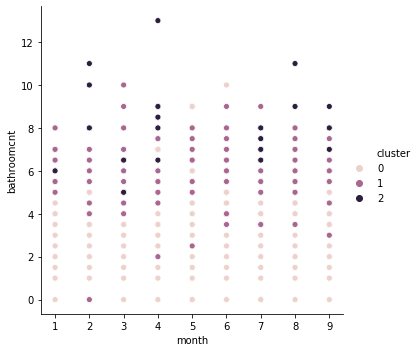

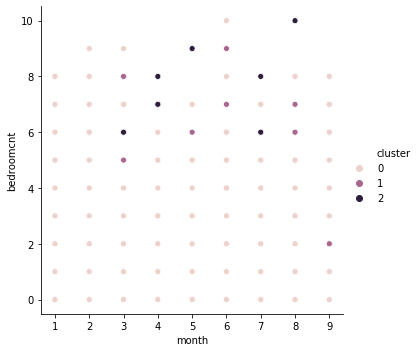

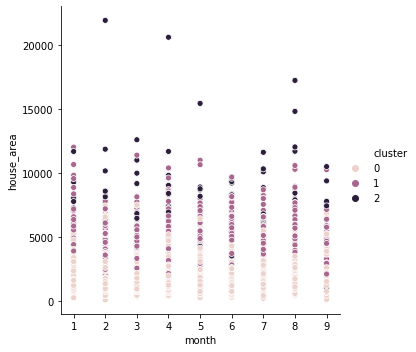

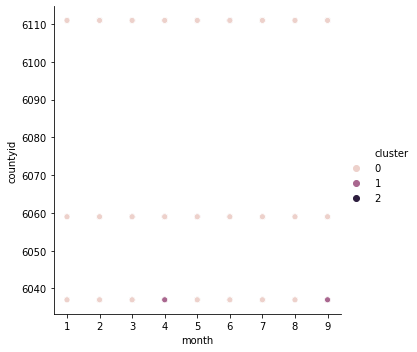

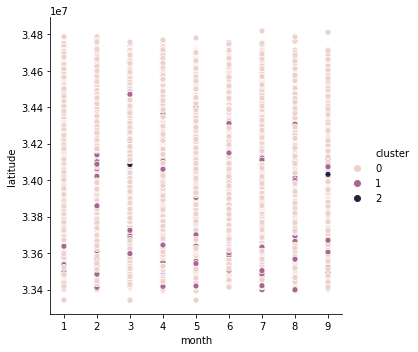

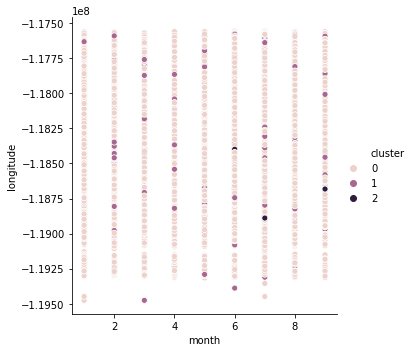

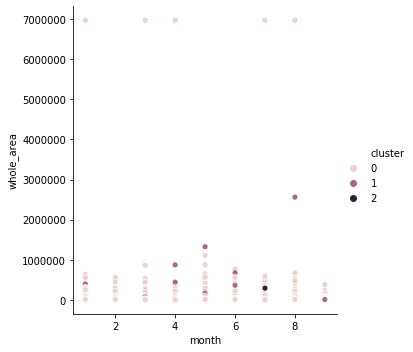

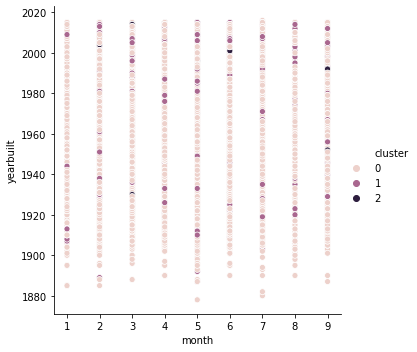

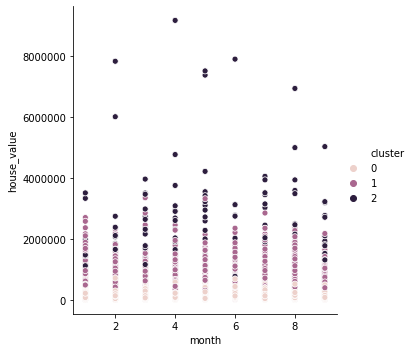

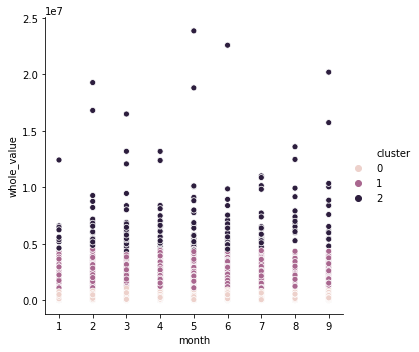

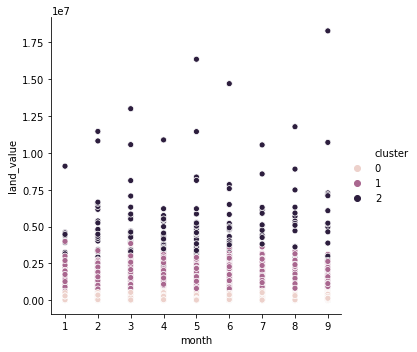

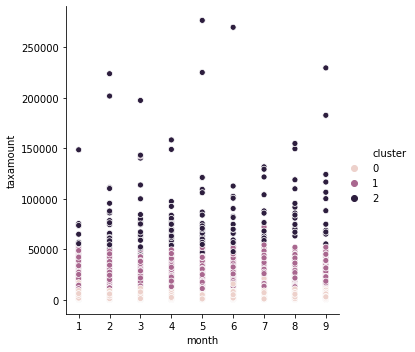

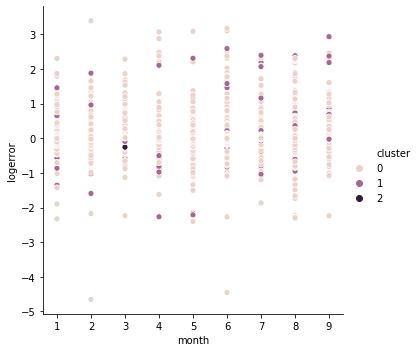

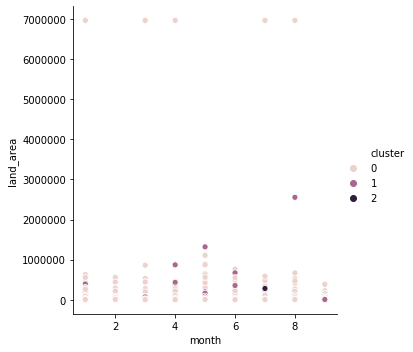

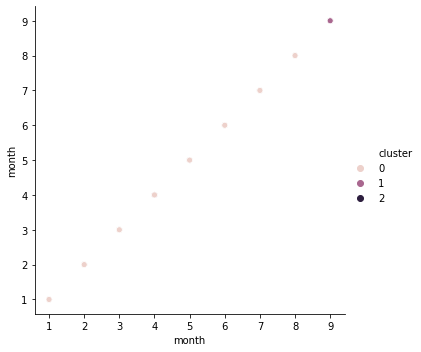

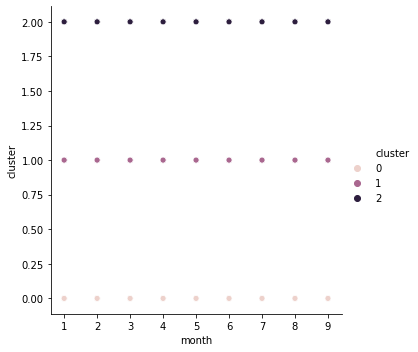

In [75]:
features = list(train_ex.columns)
for feature in features:
    sns.relplot(data=train_ex, x="month", y=feature, hue='cluster')
    plt.show()

In [76]:
train_ex = train_ex.drop("cluster",axis=1)
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(train_ex)
train_ex["cluster"] = kmeans.predict(train_ex)
train_ex.cluster = 'cluster_' + (train_ex.cluster + 1).astype('str')

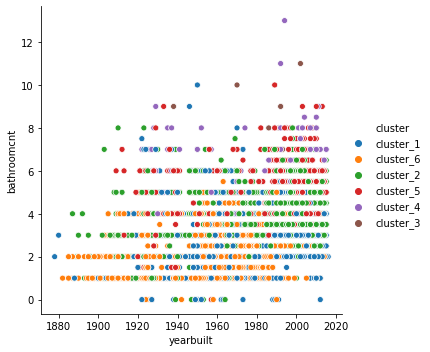

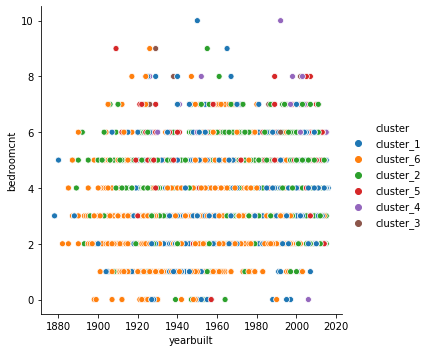

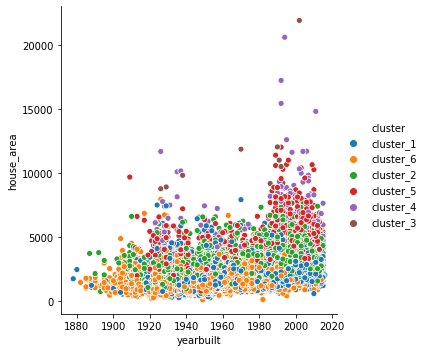

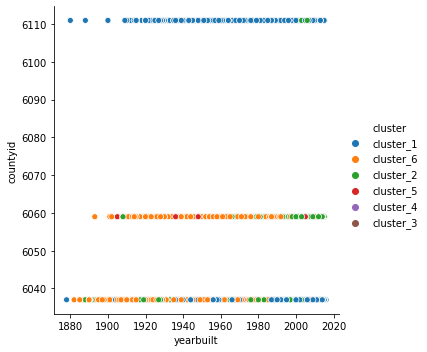

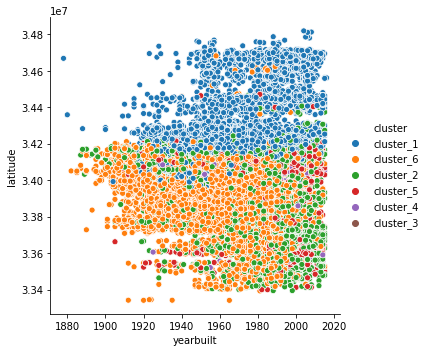

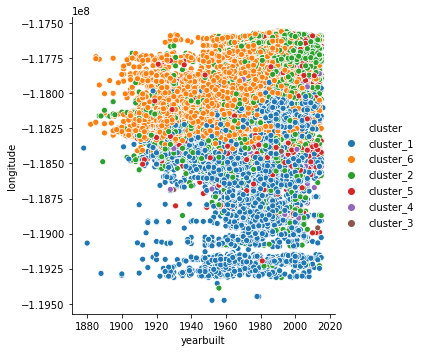

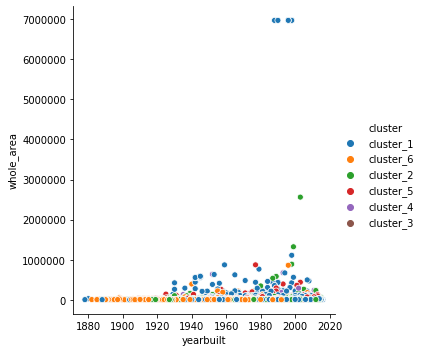

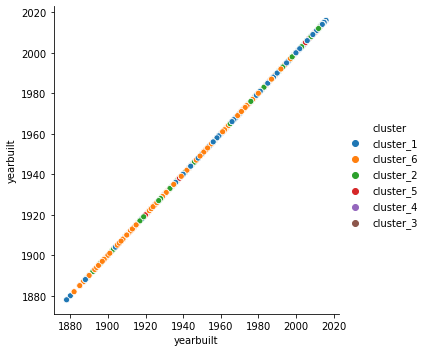

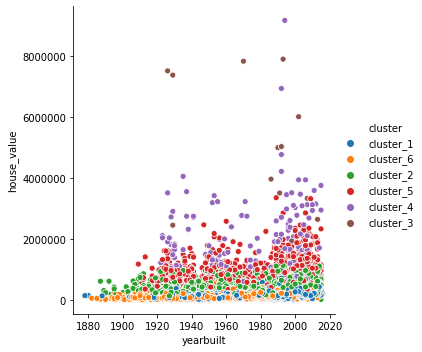

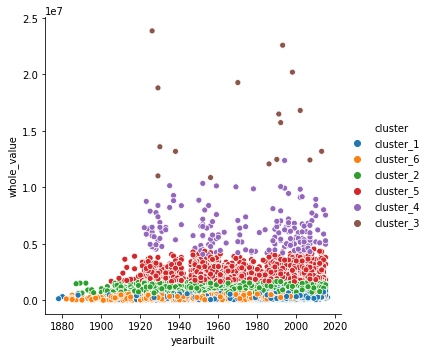

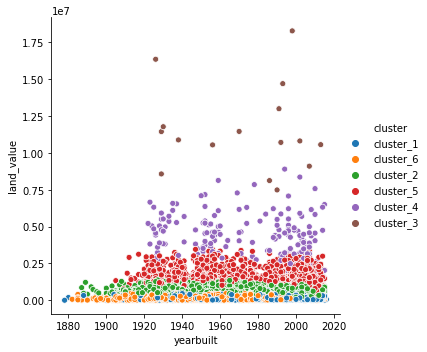

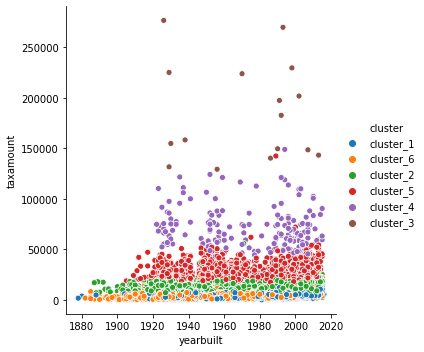

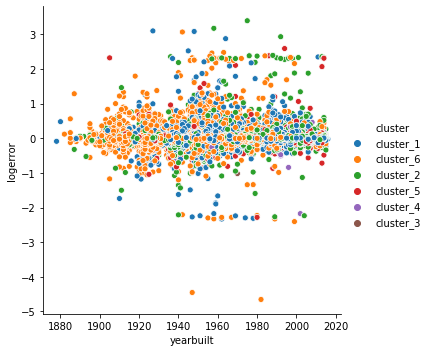

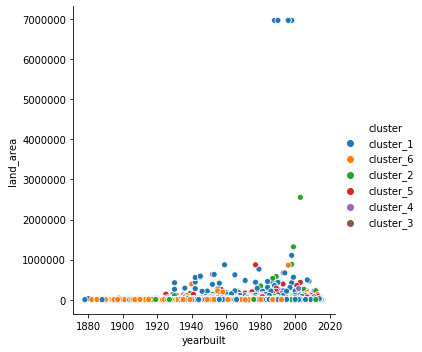

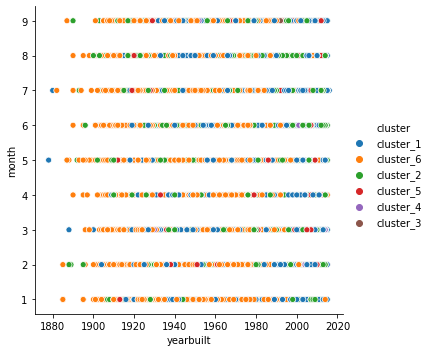

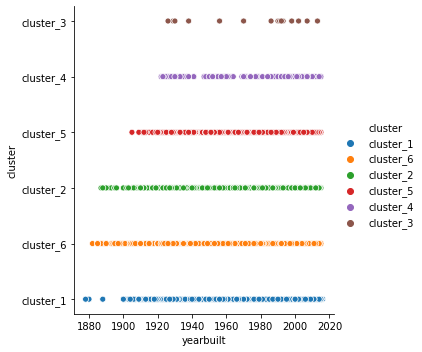

In [77]:
for feature in features:
    sns.relplot(data=train_ex, x="yearbuilt", y=feature, hue='cluster')
    plt.show()

In [78]:
train_ex = train_ex.drop("cluster",axis=1)

In [81]:
train_ex.columns[0]

'bathroomcnt'

In [82]:
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(train_ex)
train_ex["cluster"] = kmeans.predict(train_ex)
train_ex.cluster = 'cluster_' + (train_ex.cluster + 1).astype('str')

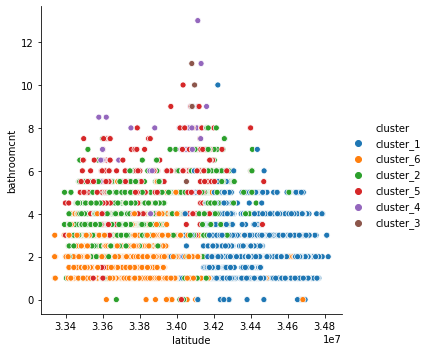

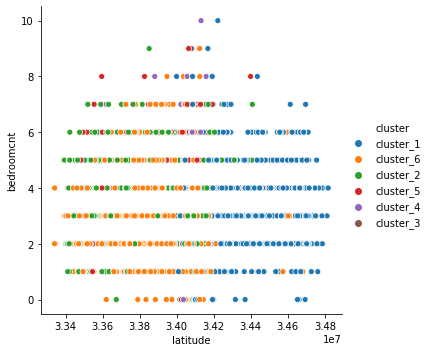

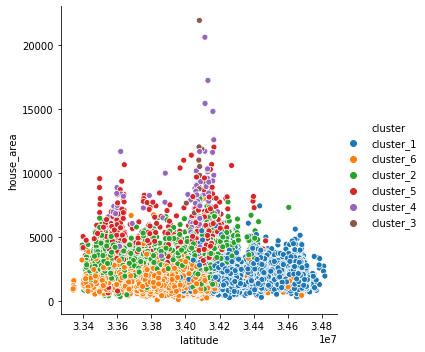

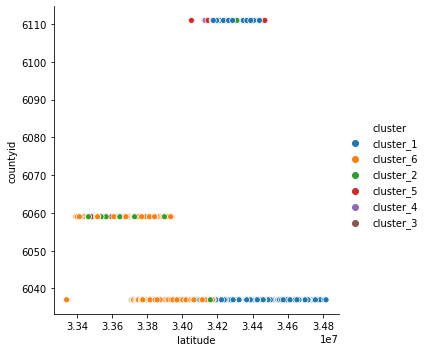

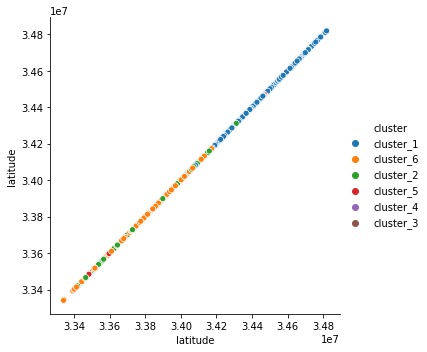

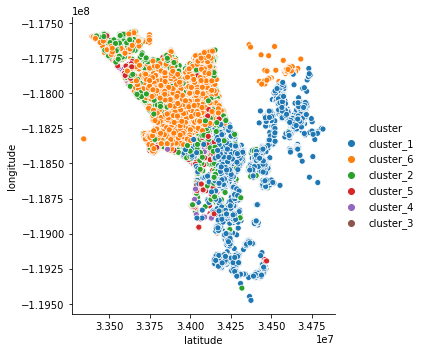

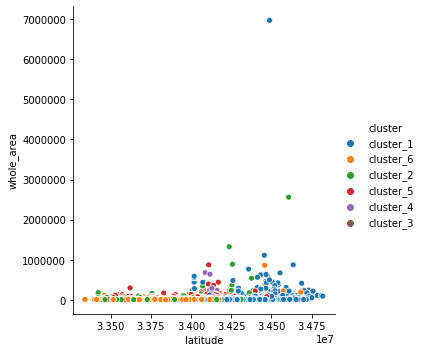

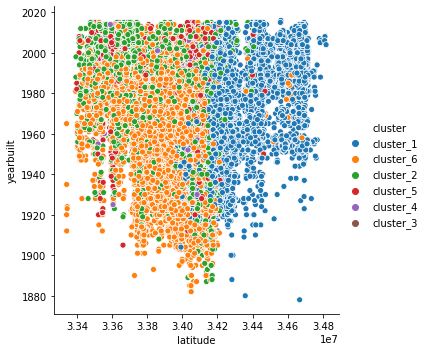

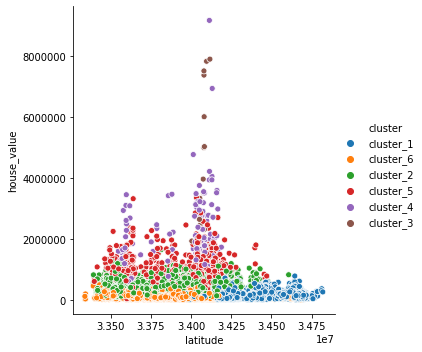

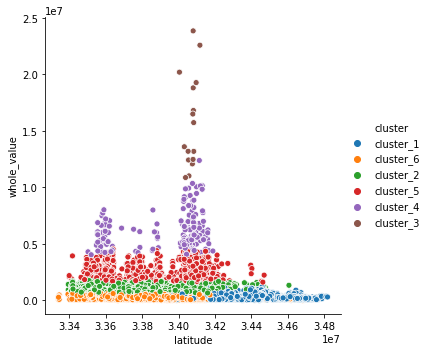

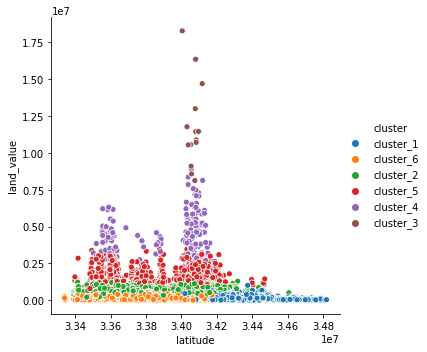

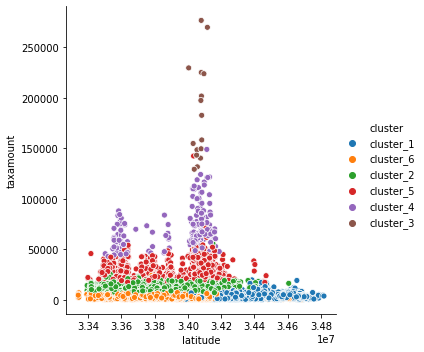

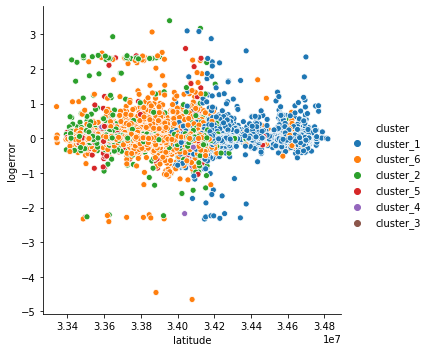

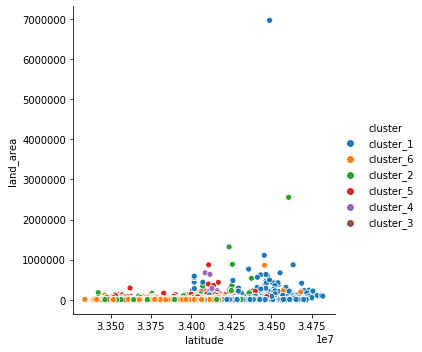

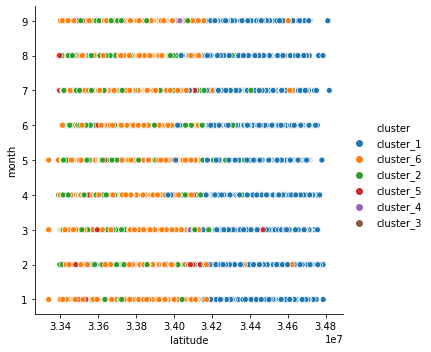

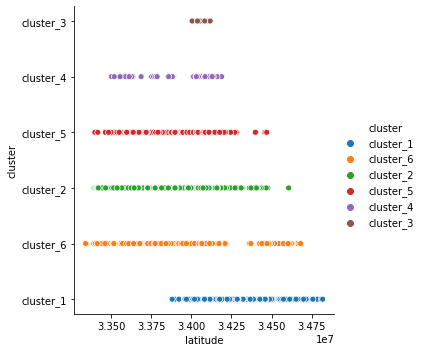

In [83]:
for feature in features:
    sns.relplot(data=train_ex, x="latitude", y=feature, hue='cluster')
    plt.show()

In [84]:
def k_cluster(df, x, y):
    kmeans = KMeans(n_clusters=3, random_state=123)
    kmeans.fit(df)
    df["cluster"] = kmeans.predict(df)

    sns.relplot(data=df, x=x, y=y, hue='cluster')

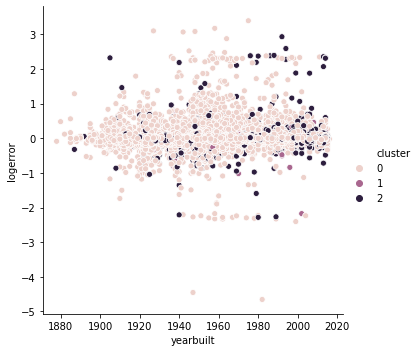

In [245]:
k_cluster(train_ex, "yearbuilt", "logerror")

In [285]:
train_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41680 entries, 28235 to 54472
Data columns (total 16 columns):
bathroomcnt    41680 non-null float64
bedroomcnt     41680 non-null int64
house_area     41680 non-null float64
countyid       41680 non-null int64
latitude       41680 non-null int64
longitude      41680 non-null int64
whole_area     41680 non-null float64
yearbuilt      41680 non-null float64
house_value    41680 non-null float64
whole_value    41680 non-null float64
land_value     41680 non-null float64
taxamount      41680 non-null float64
logerror       41680 non-null float64
land_area      41680 non-null float64
month          41680 non-null int64
cluster        41680 non-null object
dtypes: float64(10), int64(5), object(1)
memory usage: 6.7+ MB


In [291]:
if "cluster" in train_ex.columns:
    print("yes")

yes


In [292]:
def k_cluster_2d_all(df, x, n):
    if "cluster" in df.columns:
        df = df.drop("cluster",axis=1)
    
    kmeans = KMeans(n_clusters=n, random_state=123)
    kmeans.fit(df)
    df["cluster"] = kmeans.predict(df)
    df.cluster = 'cluster_' + (df.cluster + 1).astype('str')

    for col in df.columns:
        sns.relplot(data=df, x=x, y=col, hue='cluster')
        plt.show()

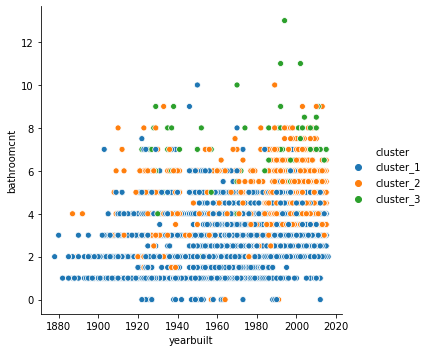

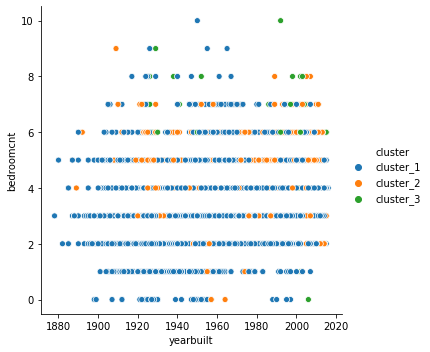

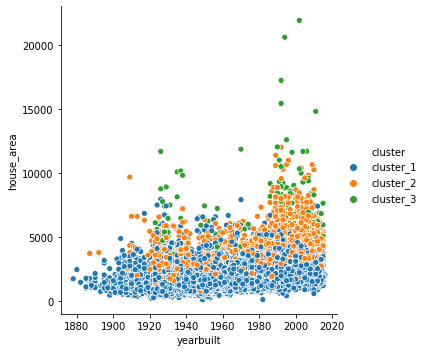

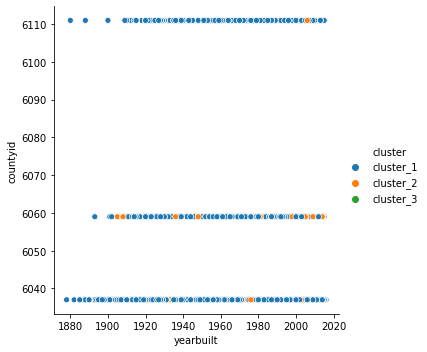

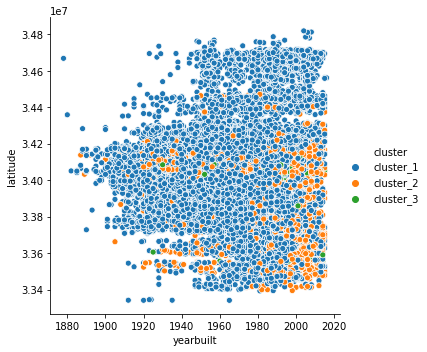

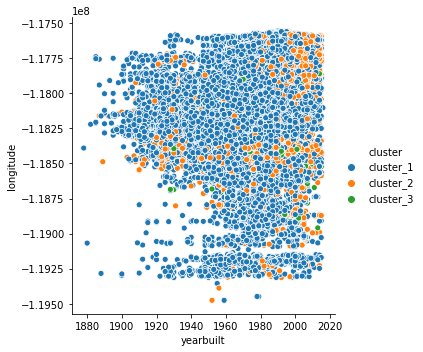

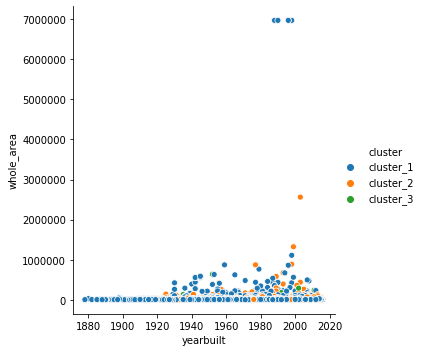

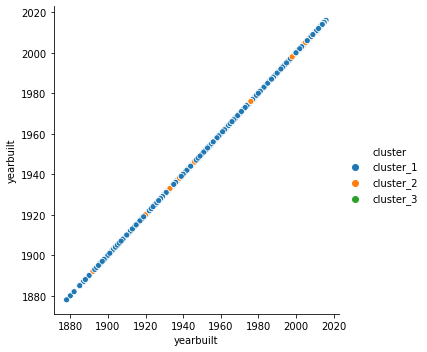

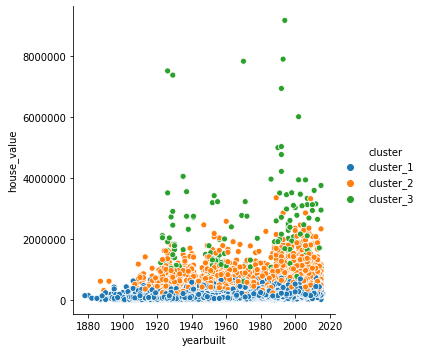

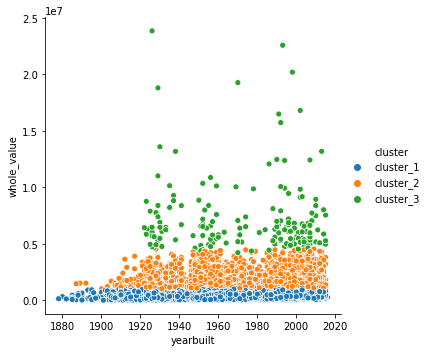

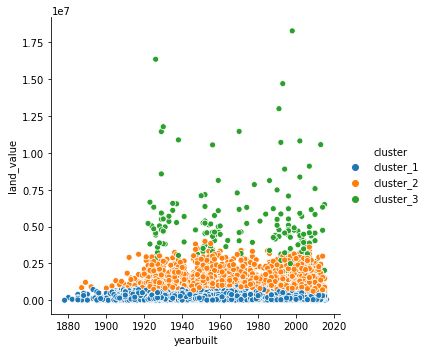

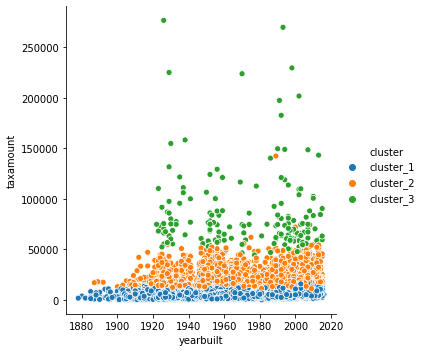

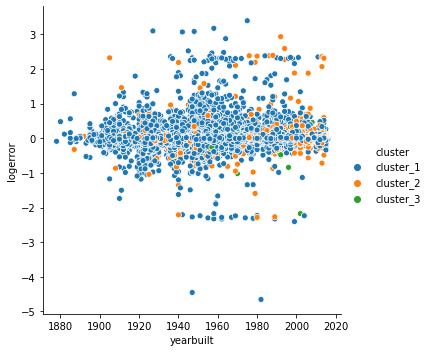

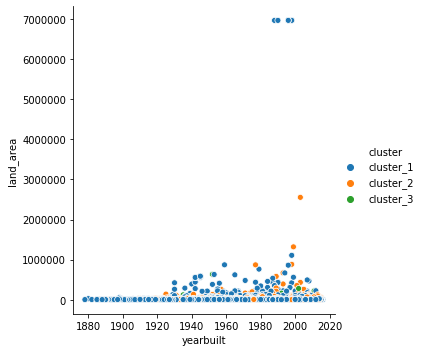

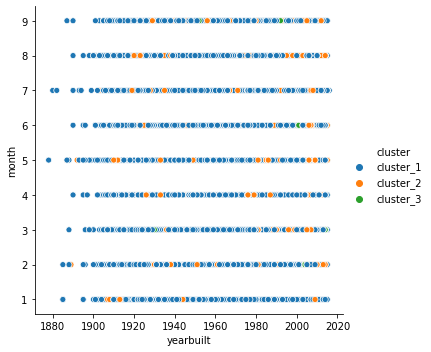

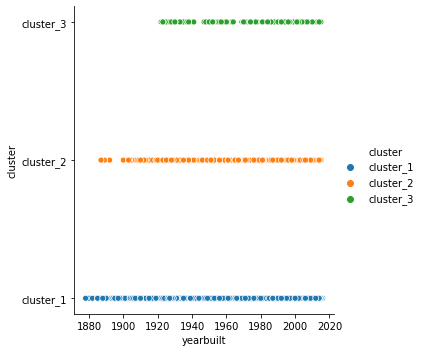

In [293]:
k_cluster_2d_all(train_ex, "yearbuilt", 3)

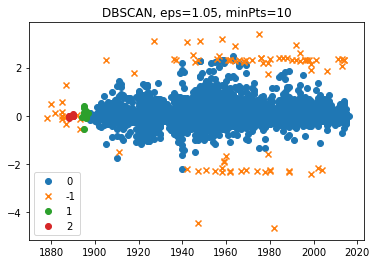

In [198]:
eps = 1.05
minPts = 10

cores, labels = dbscan(train_ex[["yearbuilt","logerror"]], eps=eps, min_samples=minPts)
train_ex['cluster'] = labels

for c in train_ex.cluster.unique():
    subset = train_ex[train_ex.cluster == c]
    marker = 'x' if c == -1 else 'o'
    plt.scatter(subset.yearbuilt, subset.logerror, marker=marker, label=c, zorder=3)
    
plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
plt.legend()

In [164]:
train_ex = train

In [175]:
train_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41680 entries, 28235 to 54472
Data columns (total 15 columns):
bathroomcnt        41680 non-null float64
bedroomcnt         41680 non-null int64
house_area         41680 non-null float64
countyid           41680 non-null int64
latitude           41680 non-null int64
longitude          41680 non-null int64
whole_area         41680 non-null float64
yearbuilt          41680 non-null float64
house_value        41680 non-null float64
whole_value        41680 non-null float64
land_value         41680 non-null float64
taxamount          41680 non-null float64
logerror           41680 non-null float64
transactiondate    41680 non-null category
land_area          41680 non-null float64
dtypes: category(1), float64(10), int64(4)
memory usage: 6.1 MB


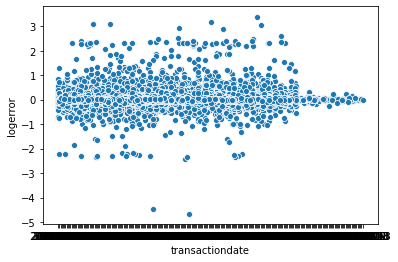

In [173]:
sns.scatterplot(train_ex.transactiondate, train.logerror)

In [201]:
train_ex.month.value_counts()

6    6229
5    5693
8    5342
7    5165
3    4948
4    4619
1    3741
2    3336
9    2607
Name: month, dtype: int64

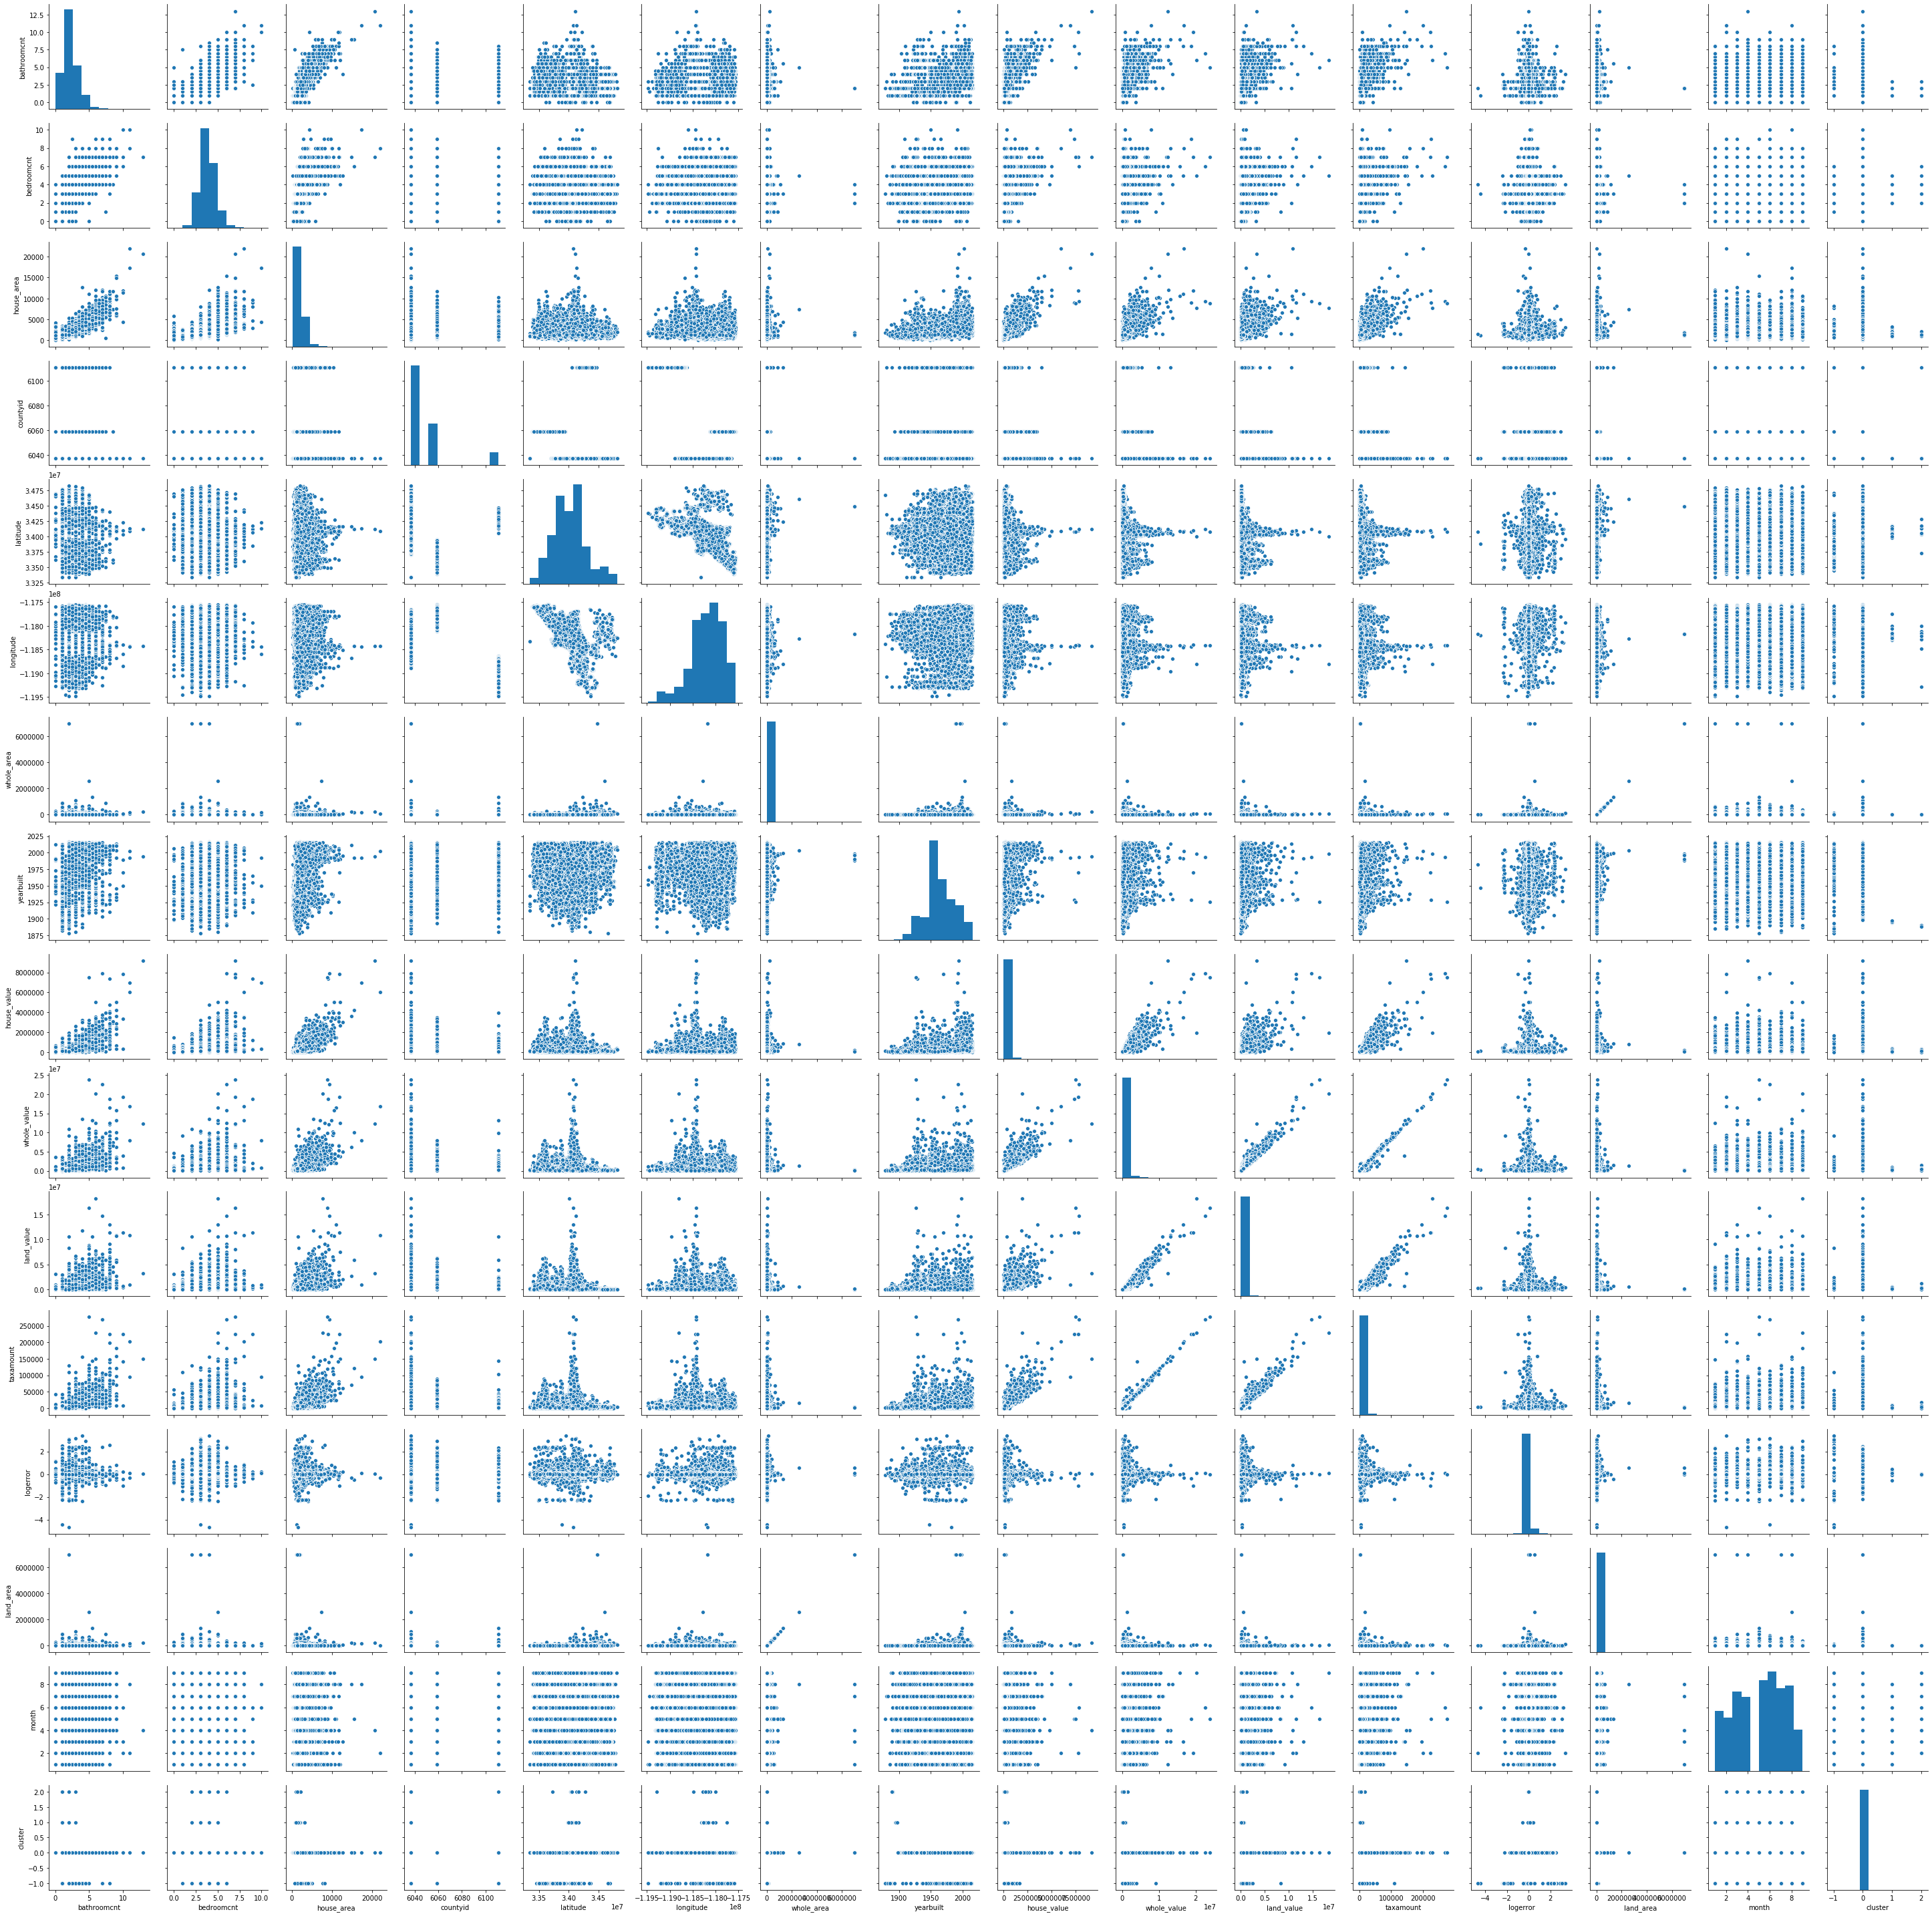

In [207]:
sns.pairplot(train_ex)

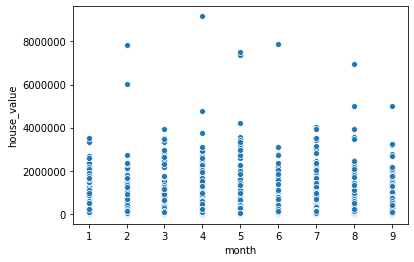

In [206]:
sns.scatterplot(train_ex.month, train_ex.house_value)

In [227]:
sub = train_ex[["yearbuilt","logerror"]]
sub.head()

yearbuilt  logerror
28235     1949.0 -0.059434
22023     1955.0  0.266040
56314     1950.0  0.109513
29544     1955.0  0.012496
11615     1958.0  0.001586

In [238]:
def db_cluster(df, eps, minPts):
    cores, labels = dbscan(df, eps=eps, min_samples=minPts)
    df['cluster'] = labels

    for c in df.cluster.unique():
        subset = df[df.cluster == c]
        marker = 'x' if c == -1 else 'o'
        plt.scatter(subset.iloc[:,0], subset.iloc[:,1], marker=marker, label=c, zorder=3)
        
    plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
    plt.legend()

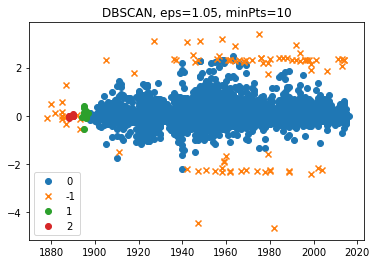

In [239]:
db_cluster(sub, 1.05, 10)

In [193]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(train_ex)
train_ex["cluster"] = kmeans.predict(train_ex)

In [232]:
# sns.relplot(data=train_ex, x=train_ex.month, y=train_ex.house_value)

In [266]:
from mpl_toolkits.mplot3d import Axes3D

def k_cluster_3d(df, x, y, z, c1, c2):
    estimators = [(f'{c1} Clusters', KMeans(n_clusters=c1)),
                (f'{c2} Clusters', KMeans(n_clusters=c2))]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})

    for ax, (title, kmeans) in zip(axs, estimators):
        # fit the kmeans object
        kmeans.fit(df)
        labels = kmeans.labels_

        ax.scatter(df[x], df[y], df[z], c=labels.astype(np.float), edgecolor='k')
        ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
        ax.xaxis.labelpad=-5
        ax.yaxis.labelpad=-5
        ax.zaxis.labelpad=-5
        ax.set(xlabel=x, ylabel=y, zlabel=y)
        ax.set(title=title)

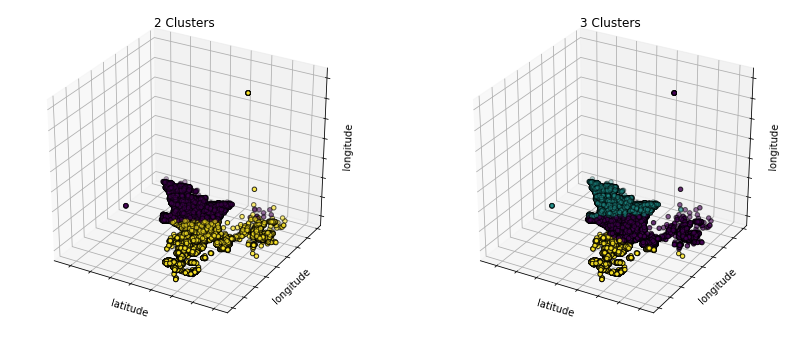

In [267]:
k_cluster_3d(train_ex[["latitude","longitude","land_area"]], "latitude", "longitude", "land_area", 2,3)

In [165]:
import model

In [237]:
train_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41680 entries, 28235 to 54472
Data columns (total 15 columns):
bathroomcnt    41680 non-null float64
bedroomcnt     41680 non-null int64
house_area     41680 non-null float64
countyid       41680 non-null int64
latitude       41680 non-null int64
longitude      41680 non-null int64
whole_area     41680 non-null float64
yearbuilt      41680 non-null float64
house_value    41680 non-null float64
whole_value    41680 non-null float64
land_value     41680 non-null float64
taxamount      41680 non-null float64
logerror       41680 non-null float64
land_area      41680 non-null float64
month          41680 non-null int64
dtypes: float64(10), int64(5)
memory usage: 6.3 MB


In [238]:
X_train_ex= train_ex.drop("logerror",axis=1)
X_train_ex.head()

bathroomcnt  bedroomcnt  house_area  countyid  latitude  longitude  \
28235          2.0           3      1895.0      6037  33960836 -118413033   
22023          2.0           3      1294.0      6037  33895532 -118011549   
56314          1.0           3      1092.0      6037  33844205 -118119583   
29544          2.0           3      1274.0      6037  34071220 -117721874   
11615          2.0           4      1136.0      6037  34003315 -117949854   

       whole_area  yearbuilt  house_value  whole_value  land_value  taxamount  \
28235      9093.0     1949.0      85181.0     170159.0     84978.0    2326.75   
22023      5964.0     1955.0      84270.0     315227.0    230957.0    4152.37   
56314      5000.0     1950.0      81388.0     221714.0    140326.0    2895.40   
29544      6885.0     1955.0      88053.0     197982.0    109929.0    2534.61   
11615      5942.0     1958.0      34292.0      49699.0     15407.0     891.41   

       land_area  month  
28235     7198.0      4  
22023     4670.0      3  
56314     3908.0      7  
29544     5611.0      4  
11615     4806.0      2

In [239]:
y_train_ex = train_ex.logerror
y_train_ex.head()

28235   -0.059434
22023    0.266040
56314    0.109513
29544    0.012496
11615    0.001586
Name: logerror, dtype: float64

In [198]:
predictions = pd.DataFrame(y_train_ex)
predictions.head()

logerror
28235 -0.059434
22023  0.266040
56314  0.109513
29544  0.012496
11615  0.001586

In [199]:
def compute_baseline(y):
    y["logerror_mean"] = y.logerror.mean()
    return y

In [200]:
compute_baseline(predictions)
predictions.head()

logerror  logerror_mean
28235 -0.059434       0.017719
22023  0.266040       0.017719
56314  0.109513       0.017719
29544  0.012496       0.017719
11615  0.001586       0.017719

In [201]:
from sklearn.linear_model import LinearRegression

def linear_model(X_train, y_train, df):
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    lm_predictions=lm.predict(X_train)
    df['logerror_lm']=lm_predictions
    return df

In [204]:
linear_model(X_train_ex, y_train_ex, predictions)
predictions.head()

logerror  logerror_mean  logerror_lm
28235 -0.059434       0.017719     0.018575
22023  0.266040       0.017719     0.014079
56314  0.109513       0.017719     0.012152
29544  0.012496       0.017719     0.018277
11615  0.001586       0.017719     0.017284

In [207]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

def evaluate(actual, model):
    MSE = mean_squared_error(actual, model)
    SSE = MSE*len(actual)
    RMSE = sqrt(MSE)
    r2 = r2_score(actual, model)
    return MSE, SSE, RMSE, r2 

In [209]:
evaluate(predictions.logerror, predictions.logerror_lm)

(0.030622162297545864,
 1276.3317245617116,
 0.17499189209087906,
 0.004010332017317708)

In [257]:
def plot_linear_model(actuals, lm, baseline):
    plot = pd.DataFrame({'actual': actuals,
                'linear model': lm,
                'baseline': baseline.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model', alpha=.5)

    plt.plot([actuals.min(),actuals.max()],[lm.min(),lm.max()], \
            c='black', ls=':', linewidth = 3, alpha=.9)
 
    plt.ticklabel_format(style="plain")
    plt.ylabel("Predicted")
    plt.xlabel("Actuals")
    plt.title("How does the liner regression model compare to the mean log error?")
    plt.show()

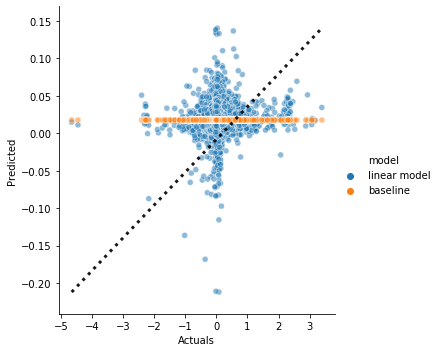

In [260]:
plot_linear_model(predictions.actuals, predictions.linear_model, predictions.baseline)

In [248]:
y_train_ex = y_train_ex.logerror

In [251]:
predictions.rename(columns={"logerror":"actuals","logerror_mean":"baseline","logerror_lm":"linear_model"}, inplace=True)

In [252]:
predictions.head()

actuals  baseline  linear_model
28235 -0.059434  0.017719      0.018575
22023  0.266040  0.017719      0.014079
56314  0.109513  0.017719      0.012152
29544  0.012496  0.017719      0.018277
11615  0.001586  0.017719      0.017284

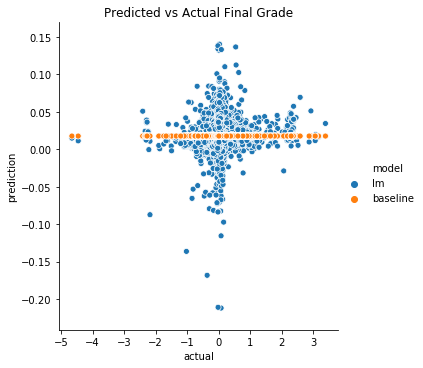

In [255]:
pd.DataFrame({'actual': y_train_ex,
              'lm': predictions.linear_model.ravel(),
              'baseline': predictions.baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# min, max = 60, 100
# plt.plot([min, max], [min, max], c='black', ls=':')
# plt.ylim(min, max)
# plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')
plt.show()

In [261]:
def k_cluster_3d(df, x, y, z, c1, c2):
    """
    Displays two 3d plots with different cluster sizes based on the dataframe entered. 
    >>> Input:
    dataframe, x-value, y-value, z-value, first number of clusters, second number of clusters
    <<< Output:
    two subplots with df plotted and clusters shown as hues
    """
    estimators = [(f'{c1} Clusters', KMeans(n_clusters=c1)),
                (f'{c2} Clusters', KMeans(n_clusters=c2))]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})

    for ax, (title, kmeans) in zip(axs, estimators):
        # fit the kmeans object
        kmeans.fit(df)
        labels = kmeans.labels_

        ax.scatter(df[x], df[y], df[z], c=labels.astype(np.float), edgecolor='k')
        ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
        ax.xaxis.labelpad=-5
        ax.yaxis.labelpad=-5
        ax.zaxis.labelpad=-5
        ax.set(xlabel=x, ylabel=y, zlabel=y)
        ax.set(title=title)

In [ ]:
k_cluster_3d()

In [263]:
from scipy import stats

In [265]:
stats.ttest_1samp(train_ex.logerror[train_ex.cluster_loc == 4],train_ex.logerror.mean())

AttributeError: 'DataFrame' object has no attribute 'cluster_loc'

In [307]:
def k_cluster_3d(df, x, y, z, n):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    labels = kmeans.labels_

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[x], df[y], df[z], c=labels, edgecolors="grey",alpha=.5)
    ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
    ax.set(xlabel=x, ylabel=y, zlabel=z)
    ax.xaxis.labelpad=-5
    ax.yaxis.labelpad=-5
    ax.zaxis.labelpad=-5
    plt.show()

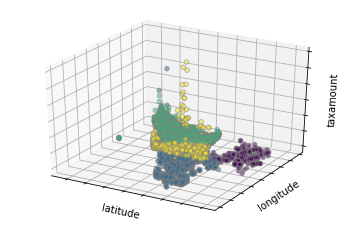

In [308]:
k_cluster_3d(df[["latitude","longitude","taxamount"]], "latitude","longitude","taxamount",4)

In [313]:
def kmeans_model(df,n):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    df["clusters"] = kmeans.labels_
    return df

In [314]:
kmeans_model(df[["latitude","longitude","taxamount"]],3)

latitude  longitude  taxamount  clusters
77578  33937685 -117996709    6317.15         0
77577  34040895 -118038169     876.43         0
77576  34300140 -118706327    1107.48         1
77575  34245368 -118282383    4478.43         2
77394  33983643 -118362294    3277.29         2
77388  33863642 -118295220    1121.80         2
77389  34429291 -118433130    6492.47         2
77390  34041582 -118485838   55446.78         2
77391  33996221 -118298692    3874.20         2
77392  33811867 -118289665    7666.44         2
77395  34035890 -117786885    6012.59         0
77396  34038410 -117772985    4068.61         0
77386  34009367 -118430958   18655.00         2
77399  33794936 -118318068    6498.65         2
77400  33989781 -118311333    2539.06         2
77402  34104244 -118281428   13171.25         2
77384  34044346 -118002920    4802.63         0
77385  34044604 -117974827    3554.26         0
77382  34194071 -118150849    2352.29         2
77381  34630590 -118212417    4018.55         2
77380  34248338 -118265897    4463.60         2
77378  33929443 -118270387    3079.64         2
77375  33930530 -117984206    5395.03         0
77374  34034575 -118424093    8886.32         2
77373  34043113 -118028669    4276.73         0
77372  34206802 -118174931    8696.65         2
77371  34558692 -118041843    4391.99         2
77406  33975225 -118345657    1126.78         2
77405  34439229 -118486609    4184.57         2
77422  34167769 -118386088    8039.69         2
...         ...        ...        ...       ...
95     33941284 -118284042    1862.11         2
97     33773127 -117849886    3084.94         0
99     34109545 -118446544    1874.26         2
101    34214075 -118422187    2439.72         2
102    33844823 -117845549    5865.88         0
103    33628725 -117873172   15474.04         0
81     34156698 -118667343   14745.19         1
83     33897641 -117783381    2800.12         0
67     34282275 -118492692    1307.93         2
58     33463484 -117591802    9018.36         0
60     33443917 -117638959    8272.94         0
61     33833199 -118191488    3749.29         0
63     34049695 -117936204    3083.24         0
78     33866396 -118138920    4033.54         0
65     34023488 -117884178    3015.21         0
66     33479611 -117688280    6760.54         0
68     33496171 -117699380   38491.98         0
76     34032773 -117841456    8924.13         0
75     34051974 -117739351    3002.30         0
77     34150178 -117757564   10295.58         0
73     34083661 -117735137    2481.45         0
72     34250870 -118421788    2086.91         2
71     34165555 -118602948    7345.85         2
70     34276431 -118447368     668.70         2
1      34449266 -119281531    5672.48         1
7      34149214 -118239357    2366.08         2
6      34145202 -118179824    9516.26         2
3      34245180 -118240722    1777.51         2
2      33886168 -117823170    6488.30         0
0      33634931 -117869207   11013.72         0

[52101 rows x 4 columns]